In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\shahd\OneDrive - Northeastern University\Documents\MPS ANALYTICS\Winter Q3\ALY 6020\Projects\Final Exam\Chocolate.csv")

In [3]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0.0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0.0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0.0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0.0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0.0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0.0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0.0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1.0,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0.0,0.186,0.267,41.904308


## Data Cleaning

In [4]:
df = df.drop(['winpercent','competitorname'], axis = 1)

In [5]:
df

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0.0,0.732,0.860
1,1,0,0,0,1,0,0,1,0.0,0.604,0.511
2,0,0,0,0,0,0,0,0,0.0,0.011,0.116
3,0,0,0,0,0,0,0,0,0.0,0.011,0.511
4,0,1,0,0,0,0,0,0,0.0,0.906,0.511
...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0.0,0.220,0.116
81,0,1,0,0,0,0,1,0,0.0,0.093,0.116
82,0,1,0,0,0,0,0,0,1.0,0.313,0.313
83,0,0,1,0,0,0,1,0,0.0,0.186,0.267


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         85 non-null     int64  
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   Multiple Pieces   61 non-null     float64
 9   sugarpercent      85 non-null     float64
 10  pricepercent      82 non-null     float64
dtypes: float64(3), int64(8)
memory usage: 7.4 KB


In [7]:
df.isnull().sum()

chocolate            0
fruity               0
caramel              0
peanutyalmondy       0
nougat               0
crispedricewafer     0
hard                 0
bar                  0
Multiple Pieces     24
sugarpercent         0
pricepercent         3
dtype: int64

In [8]:
df['pricepercent'] = df['pricepercent'].fillna(df['pricepercent'].mean())
df['Multiple Pieces'] = df['Multiple Pieces'].fillna(df['Multiple Pieces'].median())

In [9]:
df['Multiple Pieces'] = df['Multiple Pieces'].astype(int)
df['sugarpercent'] = df['sugarpercent'].round(2)
df['pricepercent'] = df['pricepercent'].round(2)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.00,0.00,0.00,1.00,1.00
fruity,85.0,0.447059,0.500140,0.00,0.00,0.00,1.00,1.00
caramel,85.0,0.164706,0.373116,0.00,0.00,0.00,0.00,1.00
peanutyalmondy,85.0,0.164706,0.373116,0.00,0.00,0.00,0.00,1.00
nougat,85.0,0.082353,0.276533,0.00,0.00,0.00,0.00,1.00
crispedricewafer,85.0,0.082353,0.276533,0.00,0.00,0.00,0.00,1.00
hard,85.0,0.176471,0.383482,0.00,0.00,0.00,0.00,1.00
bar,85.0,0.247059,0.433861,0.00,0.00,0.00,0.00,1.00
Multiple Pieces,85.0,0.341176,0.476918,0.00,0.00,0.00,1.00,1.00
sugarpercent,85.0,0.477412,0.282287,0.01,0.22,0.46,0.73,0.99


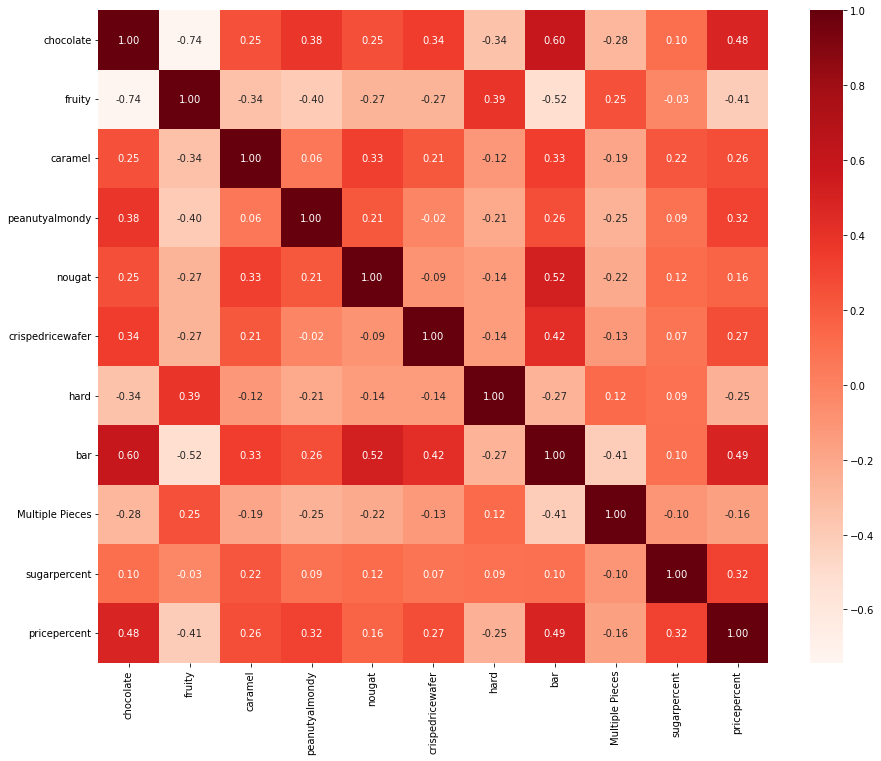

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True,fmt=".2f");

## Modelling

### Logistic Regression

In [12]:
X=df.drop(['chocolate'], axis = 1)

In [13]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            feature       VIF
0            fruity  2.334301
1           caramel  1.583942
2    peanutyalmondy  1.536943
3            nougat  1.998904
4  crispedricewafer  1.682878
5              hard  1.488705
6               bar  3.697895
7   Multiple Pieces  1.704847
8      sugarpercent  4.276636
9      pricepercent  5.452093


In [14]:
X2=df.drop(['chocolate','fruity','pricepercent','sugarpercent','bar'], axis = 1)

In [15]:
vif_data2 = pd.DataFrame()
vif_data2["feature"] = X2.columns
vif_data2["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif_data2)

            feature       VIF
0           caramel  1.364445
1    peanutyalmondy  1.122019
2            nougat  1.303960
3  crispedricewafer  1.132800
4              hard  1.131248
5   Multiple Pieces  1.140575


In [16]:
y=df[['chocolate']]
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(X2,y, test_size=0.20,random_state=42)
print(X_trainLR.shape)
print(X_testLR.shape)

(68, 6)
(17, 6)


In [17]:
sc = StandardScaler()
x_train = sc.fit_transform(X_trainLR.values)
X_trainLR = pd.DataFrame(x_train,index = X_trainLR.index, columns = X_trainLR.columns)
x_test = sc.fit_transform(X_testLR.values)
X_testLR = pd.DataFrame(x_test,index = X_testLR.index, columns = X_testLR.columns)

In [18]:
m1= sm.Logit(y_trainLR, X_trainLR.astype(float))
start_time = time.time()
LRM1 = m1.fit()
training_time = time.time() - start_time
print(LRM1.summary())

Optimization terminated successfully.
         Current function value: 0.464225
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              chocolate   No. Observations:                   68
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            5
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.3196
Time:                        12:21:57   Log-Likelihood:                -31.567
converged:                       True   LL-Null:                       -46.396
Covariance Type:            nonrobust   LLR p-value:                 1.722e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
caramel              0.2611      0.332      0.785      0.432      -0.391       0.913
peanutyalmo

In [19]:
start_time = time.time()
y_pred1=LRM1.predict(X_testLR).round() 
inference_time = time.time() - start_time
print('Training Time : ', training_time)
print('Inference Time : ',inference_time)
print(confusion_matrix(y_testLR, y_pred1))
print(classification_report(y_testLR, y_pred1))

Training Time :  0.0
Inference Time :  0.0
[[9 0]
 [2 6]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.75      0.86         8

    accuracy                           0.88        17
   macro avg       0.91      0.88      0.88        17
weighted avg       0.90      0.88      0.88        17



### Decision Trees

In [20]:
X=df.drop(['chocolate'], axis = 1)
y=df[['chocolate']]
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X,y, test_size=0.20,random_state=42)

In [21]:
DT1 = DecisionTreeClassifier(random_state=42,max_depth=4)
start_time = time.time()
DTM1 = DT1.fit(X_trainDT,y_trainDT)
training_time = time.time() - start_time

In [22]:
start_time = time.time()
y_predDT = DTM1.predict(X_testDT)
inference_time = time.time() - start_time
print('Training Time : ', training_time)
print('Inference Time : ',inference_time)
print(confusion_matrix(y_testDT, y_predDT))
print(classification_report(y_testDT, y_predDT))

Training Time :  0.0
Inference Time :  0.0
[[9 0]
 [2 6]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.75      0.86         8

    accuracy                           0.88        17
   macro avg       0.91      0.88      0.88        17
weighted avg       0.90      0.88      0.88        17



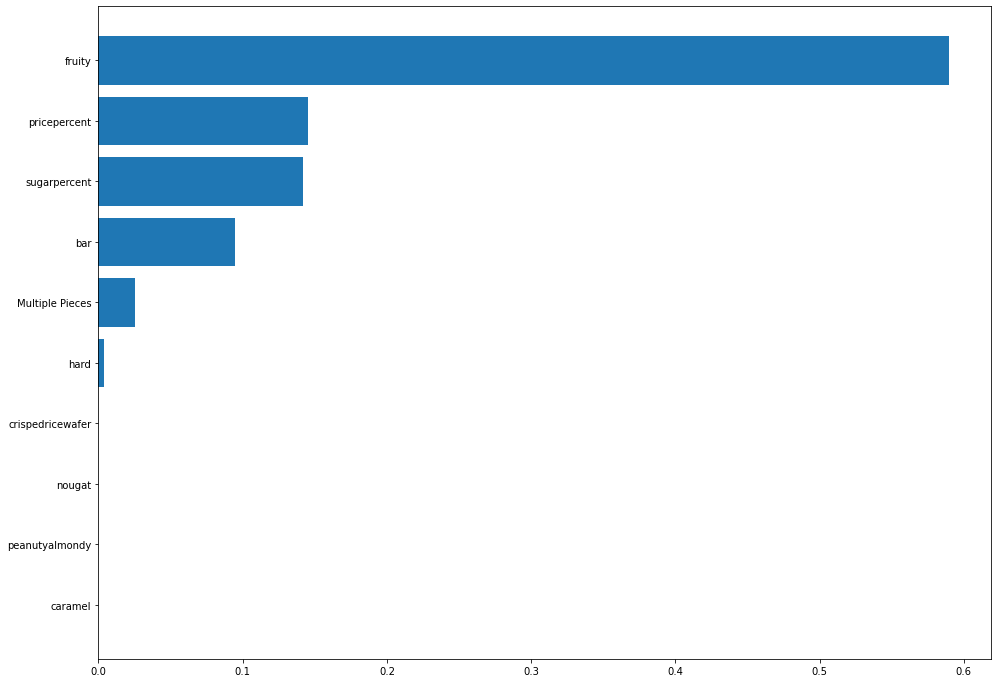

In [23]:
importances = DTM1.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize =(16,12))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_trainDT.columns)[indices])

### Random Forest

In [24]:
X=df.drop(['chocolate'], axis = 1)
y=df[['chocolate']]
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(X,y, test_size=0.20,random_state=42)

In [25]:
sc = StandardScaler()
x_train = sc.fit_transform(X_trainRF.values)
X_trainRF = pd.DataFrame(x_train,index = X_trainRF.index, columns = X_trainRF.columns)
x_test = sc.fit_transform(X_testRF.values)
X_testRF = pd.DataFrame(x_test,index = X_testRF.index, columns = X_testRF.columns)

In [26]:
RFM = RandomForestClassifier(random_state=42,n_estimators=1000)   
start_time = time.time()
RFM.fit(X_trainRF,y_trainRF)
training_time = time.time() - start_time

In [27]:
start_time = time.time()
y_predRD = RFM.predict(X_testRF)
inference_time = time.time() - start_time
print('Training Time : ', training_time)
print('Inference Time : ',inference_time)
print(confusion_matrix(y_testRF, y_predRD))
print(classification_report(y_testRF, y_predRD))

Training Time :  0.6617982387542725
Inference Time :  0.046987295150756836
[[9 0]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



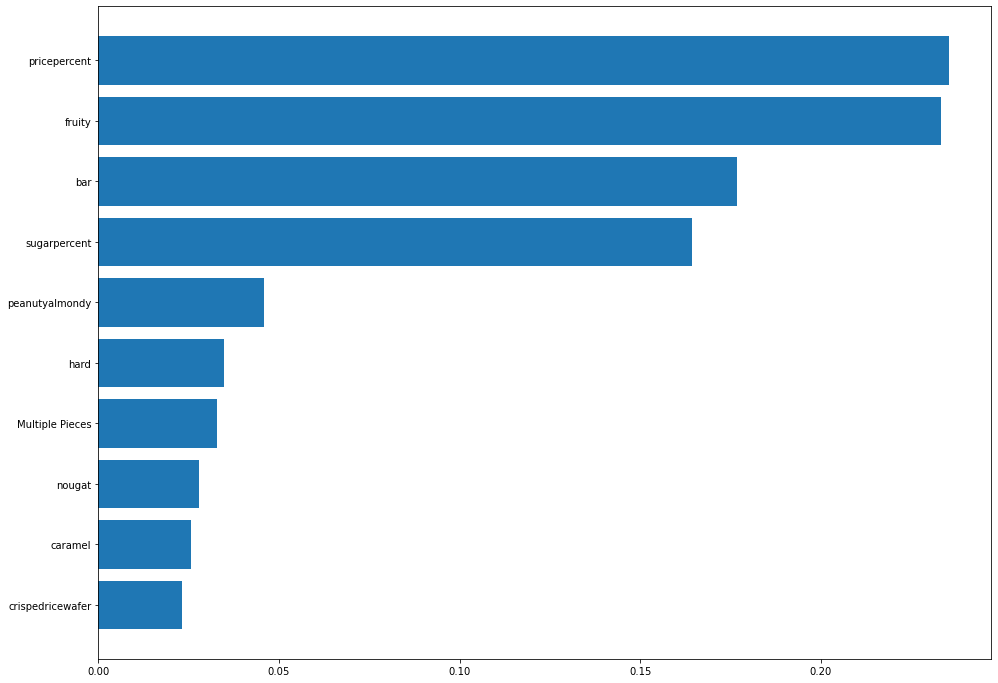

In [28]:
importances = RFM.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize =(16,12))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_trainRF.columns)[indices])

### Gradient Boosting

In [29]:
X=df.drop(['chocolate'], axis = 1)
y=df[['chocolate']]
X_trainGB, X_testGB, y_trainGB, y_testGB = train_test_split(X,y, test_size=0.20,random_state=42)

In [30]:
GBM = GradientBoostingClassifier(random_state=42, n_estimators = 1000)   
start_time = time.time()
GBM.fit(X_trainGB,y_trainGB)
training_time = time.time() - start_time

In [31]:
start_time = time.time()
y_predGB = GBM.predict(X_testGB)
inference_time = time.time() - start_time
print('Training Time : ', training_time)
print('Inference Time : ',inference_time)
print(confusion_matrix(y_testGB, y_predGB))
print(classification_report(y_testGB, y_predGB))

Training Time :  0.28936219215393066
Inference Time :  0.0
[[9 0]
 [1 7]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.88      0.93         8

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



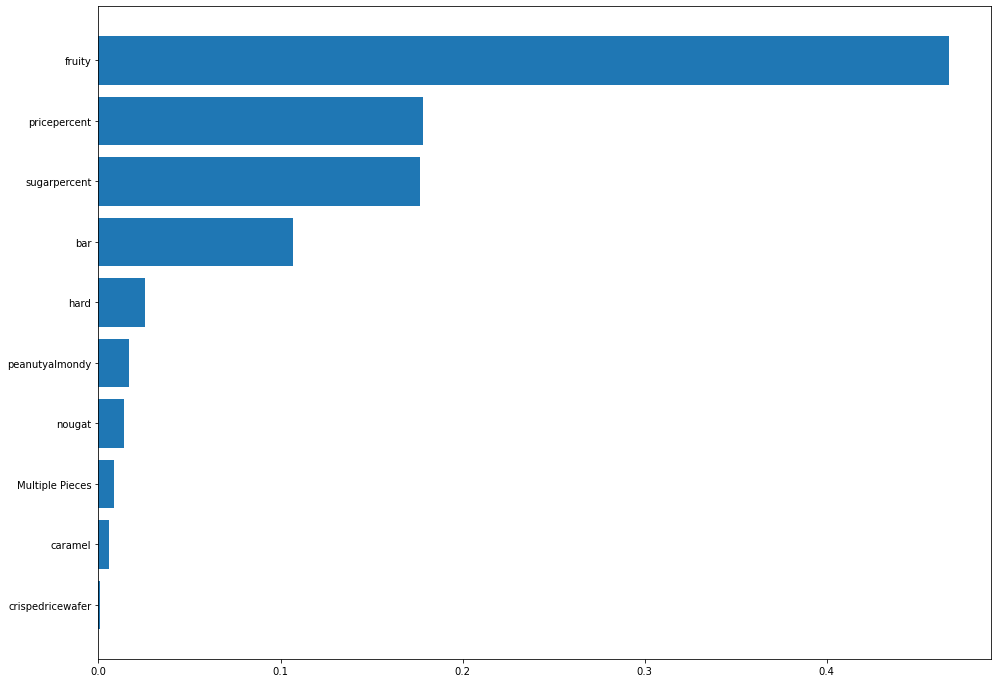

In [32]:
importances = GBM.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize =(16,12))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_trainRF.columns)[indices])